In [3]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from project1_lib import make_franke_vecs

from nn import NN, Layer, cv_regression_scores_nn, plot_bias_variance_nn_reg

import time

# READS THE INPUT DATA

In [3]:
data, target = make_franke_vecs(0.3, 20)
target = np.expand_dims(target, axis=1)

# CHOOSING THE RIGHT NUMBER OF EPOCHS AND LAYERS

## Testing for a neural network with 3 hidden layers for two different learning rates. 

## Sets up the network with three hidden layers. 

In [4]:
#Setting up each layer
l1 = Layer(data.shape[1], 20,activation_function= "sigmoid")
l2 = Layer(20, 10, activation_function = "sigmoid")
l3 = Layer(10,5,activation_function = "sigmoid")
l4 = Layer(5,1,activation_function = None)

#Setting up the nerual network and adds each layer.
nnet = NN(cost_function="mse")
nnet.add_layer(l1)
nnet.add_layer(l2)
nnet.add_layer(l3)
nnet.add_layer(l4)

## Testing for learning rate = 0.001 for different number of epochs. 

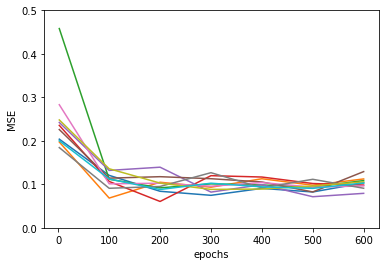

0.06057579419401704


In [41]:
import matplotlib.pyplot as plt 

epochs = [2, 100, 200, 300, 400,500, 600]

time_values = np.zeros(len(epochs))
test_mse = np.zeros(len(epochs))
train_mse = np.zeros(len(epochs))
min_test_mse = 100

n = 10
for _ in range(n):
    for i, epoch in enumerate(epochs):
        X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)
        
        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)

        start_time = time.time()
        nnet.train(X_train, y_train, epochs = epoch, batch_size = 50, alpha = 0.001, lam = 0)
        end_time = time.time()
        test_pred = nnet.predict(X_test)
        train_pred = nnet.predict(X_train)
        test_mse[i] = (mean_squared_error(test_pred, y_test))
        train_mse[i] = (mean_squared_error(train_pred, y_train))
        time_values[i] = (end_time - start_time)
    plt.plot(epochs, test_mse)
    if min(test_mse) < min_test_mse:
        min_test_mse = min(test_mse)

plt.xlabel("epochs")
plt.ylabel("MSE")
plt.ylim((0, 0.5))
# plt.title("Test error for 10 different runs with learning rate = 0.001")
plt.savefig(fname = r"Plots\nn_3_layers_lr_001_test_MSE_10_runs.png")
plt.show()

print(min_test_mse)

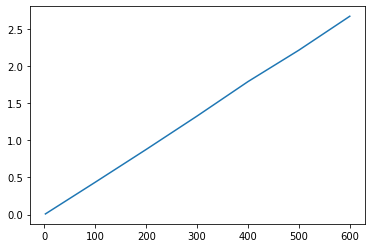

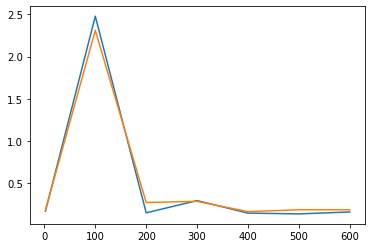

In [107]:
plt.plot(epochs, time_values)
plt.show()

plt.plot(epochs, test_mse)
plt.plot(epochs, train_mse)
    
plt.show()

## Testing for different number of epochs with learning rate = 0.00001

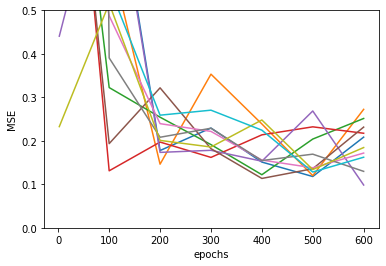

0.09839718880991574


In [42]:
import matplotlib.pyplot as plt 

epochs = [2, 100, 200, 300, 400,500, 600]


time_values = np.zeros(len(epochs))
test_mse = np.zeros(len(epochs))
train_mse = np.zeros(len(epochs))
min_test_mse = 100

n = 10
for _ in range(n):
    for i, epoch in enumerate(epochs):
        X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)
        
        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)

        start_time = time.time()
        nnet.train(X_train, y_train, epochs = epoch, batch_size = 50, alpha = 0.00001, lam = 0)
        end_time = time.time()
        test_pred = nnet.predict(X_test)
        train_pred = nnet.predict(X_train)
        test_mse[i] = (mean_squared_error(test_pred, y_test))
        train_mse[i] = (mean_squared_error(train_pred, y_train))
        time_values[i] = (end_time - start_time)
    plt.plot(epochs, test_mse)
    if min(test_mse) < min_test_mse:
        min_test_mse = min(test_mse)

plt.xlabel("epochs")
plt.ylabel("MSE")
plt.ylim((0,0.5))
# plt.title("Test error for 10 different runs with learning rate = 0.00001")
plt.savefig(fname=r"Plots\nn_3_layers_lr_00001_test_MSE_10_runs.png")
plt.show()    

print(min_test_mse)

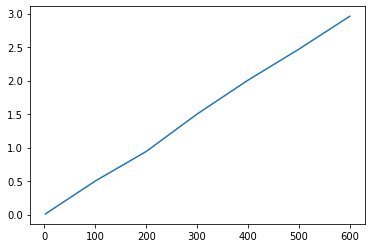

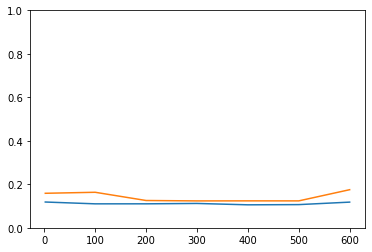

In [90]:
    
plt.plot(epochs, time_values)
plt.show()



# Testing for  a nerual network with 6 hidden layers for two different learning rates. 

## Learning rate = 0.001

Doing the same analysis as before with regards to trianing error and time used for fitting the network. 

In [80]:
#Setting up each layer
l1 = Layer(data.shape[1], 50,activation_function= "sigmoid")
l2 = Layer(50, 40, activation_function = "sigmoid")
l3 = Layer(40,30,activation_function = "sigmoid")
l4 = Layer(30, 20, activation_function = "sigmoid")
l5 = Layer(20, 10, activation_function = "sigmoid")
l6 = Layer(10, 5, activation_function = "sigmoid")
l7 = Layer(5,1,activation_function = None)

#Setting up the nerual network and adds each layer.
nnet = NN(cost_function="mse")
nnet.add_layer(l1)
nnet.add_layer(l2)
nnet.add_layer(l3)
nnet.add_layer(l4)
nnet.add_layer(l5)
nnet.add_layer(l6)
nnet.add_layer(l7)


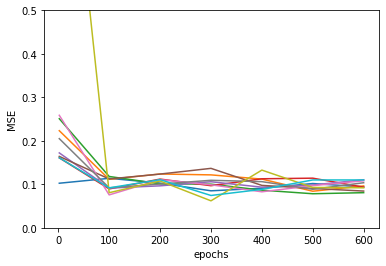

0.062046014103070354


In [43]:
import matplotlib.pyplot as plt 

epochs = [2, 100, 200, 300, 400,500, 600]


time_values = np.zeros(len(epochs))
test_mse = np.zeros(len(epochs))
train_mse = np.zeros(len(epochs))
min_test_mse = 100

n = 10
for _ in range(n):
    for i, epoch in enumerate(epochs):
        X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)
        
        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)

        start_time = time.time()
        nnet.train(X_train, y_train, epochs = epoch, batch_size = 50, alpha = 0.001, lam = 0)
        end_time = time.time()
        test_pred = nnet.predict(X_test)
        train_pred = nnet.predict(X_train)
        test_mse[i] = (mean_squared_error(test_pred, y_test))
        train_mse[i] = (mean_squared_error(train_pred, y_train))
        time_values[i] = (end_time - start_time)
    plt.plot(epochs, test_mse)
    if min(test_mse) < min_test_mse:
        min_test_mse = min(test_mse)

plt.xlabel("epochs")
plt.ylabel("MSE")
plt.ylim((0,0.5))
# plt.title("Test error for 10 different runs")
plt.savefig(fname=r"Plots\nn_layers6_lr001_testmse_runs10.png")
plt.show()

print(min_test_mse)

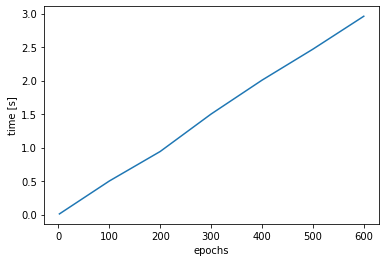

In [91]:
plt.plot(epochs, time_values)
plt.xlabel("epochs")
plt.ylabel("time [s]")

plt.show()



## Learning rate = 0.00001

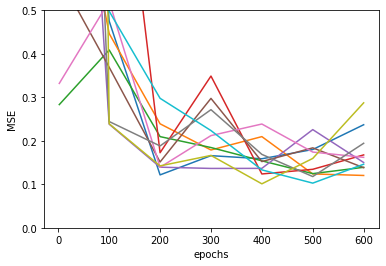

0.10111361197102953


In [44]:
import matplotlib.pyplot as plt 

epochs = [2, 100, 200, 300, 400,500, 600]


time_values = np.zeros(len(epochs))
test_mse = np.zeros(len(epochs))
train_mse = np.zeros(len(epochs))
min_test_mse = 100

n = 10
for _ in range(n):
    for i, epoch in enumerate(epochs):
        X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)
        
        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)

        start_time = time.time()
        nnet.train(X_train, y_train, epochs = epoch, batch_size = 50, alpha = 0.00001, lam = 0)
        end_time = time.time()
        test_pred = nnet.predict(X_test)
        train_pred = nnet.predict(X_train)
        test_mse[i] = (mean_squared_error(test_pred, y_test))
        train_mse[i] = (mean_squared_error(train_pred, y_train))
        time_values[i] = (end_time - start_time)
    plt.plot(epochs, test_mse)
    if min(test_mse) < min_test_mse:
        min_test_mse = min(test_mse)

plt.xlabel("epochs")
plt.ylabel("MSE")
# plt.title("Test error for 10 different runs")
plt.ylim((0,0.5))
plt.savefig(fname=r"Plots\nn_6_layers_lr_00001_test_MSE_10_runs.png")
plt.show()

print(min_test_mse)

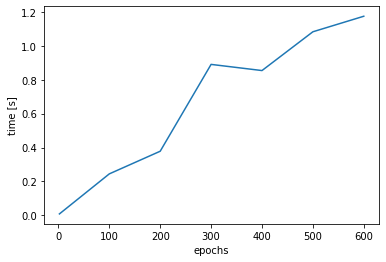

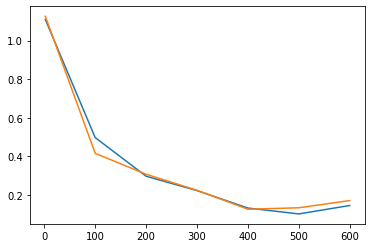

In [45]:
plt.plot(epochs, time_values)
plt.xlabel("epochs")
plt.ylabel("time [s]")
plt.show()




# Testing for different polynomial degrees of the input to see if we are able to improve the results. 

Will use the network with 3 different layer and a learning rate = 0.001. The test will be done for different values of the regularization parameters. 

In [4]:
data, target = make_franke_vecs(0.3, 20)
target = np.expand_dims(target, axis=1)
import matplotlib.pyplot as plt 

Regularization parameter : 0.1
Degree: 2
0
MSE_final:  0.11296059658351684
1
MSE_final:  0.11142006708919745
2
MSE_final:  0.08499598413237534
3
MSE_final:  0.12611687416299316
4
MSE_final:  0.08629914464142181
CV-MSE:  0.10435853332190093
Degree: 4
0
MSE_final:  0.11141825181339989
1
MSE_final:  0.12251268416921532
2
MSE_final:  0.1087631613390968
3
MSE_final:  0.10285375076021827
4
MSE_final:  0.0856048945615782
CV-MSE:  0.10623054852870169
Degree: 6
0
MSE_final:  0.11167375096759331
1
MSE_final:  0.10936689721807602
2
MSE_final:  0.10066228967129116
3
MSE_final:  0.11056758127579151
4
MSE_final:  0.11928834217830886
CV-MSE:  0.11031177226221218
Degree: 8
0
MSE_final:  0.11418618985564395
1
MSE_final:  0.11568664199324927
2
MSE_final:  0.10551222704238465
3
MSE_final:  0.11264681955665275
4
MSE_final:  0.1028818458257241
CV-MSE:  0.11018274485473094
Degree: 10
0
MSE_final:  0.11688727143613149
1
MSE_final:  0.10809673423973801
2
MSE_final:  0.0970434631797112
3
MSE_final:  0.11193134

C:\Users\marth\OneDrive\Dokumenter\GitHub\FYS-STK4155-project-2\nn.py:69: RuntimeWarning: overflow encountered in exp
  vals = 1/(1+np.exp(-z))


3
MSE_final:  0.10974354685713557
4
MSE_final:  0.07071163517299661
CV-MSE:  0.10963915809885036
Degree: 28
0
MSE_final:  0.11402791332091156
1
MSE_final:  0.12670418045129445


C:\Users\marth\OneDrive\Dokumenter\GitHub\FYS-STK4155-project-2\nn.py:69: RuntimeWarning: overflow encountered in exp
  vals = 1/(1+np.exp(-z))


2
MSE_final:  0.09995653928863509
3
MSE_final:  0.13805192259453009
4
MSE_final:  0.08542162172581781
CV-MSE:  0.11283243547623781
Degree: 30


C:\Users\marth\OneDrive\Dokumenter\GitHub\FYS-STK4155-project-2\nn.py:69: RuntimeWarning: overflow encountered in exp
  vals = 1/(1+np.exp(-z))


0
MSE_final:  0.08580221080739583
1
MSE_final:  0.10505028293378219


C:\Users\marth\OneDrive\Dokumenter\GitHub\FYS-STK4155-project-2\nn.py:69: RuntimeWarning: overflow encountered in exp
  vals = 1/(1+np.exp(-z))


2
MSE_final:  0.13373237102468363
3
MSE_final:  0.12697348440132977


C:\Users\marth\OneDrive\Dokumenter\GitHub\FYS-STK4155-project-2\nn.py:69: RuntimeWarning: overflow encountered in exp
  vals = 1/(1+np.exp(-z))


4
MSE_final:  0.12046703454855831
CV-MSE:  0.11440507674314995
Regularization parameter : 0.0001
Degree: 2
0
MSE_final:  0.09138670155476165
1
MSE_final:  0.107229600636458
2
MSE_final:  0.10298982773668408
3
MSE_final:  0.08993055701058414
4
MSE_final:  0.12126618159146003
CV-MSE:  0.10256057370598959
Degree: 4
0
MSE_final:  0.13775289596746987
1
MSE_final:  0.10704319352056209
2
MSE_final:  0.10370679888061425
3
MSE_final:  0.09246818614052027
4
MSE_final:  0.08049508450892033
CV-MSE:  0.10429323180361735
Degree: 6
0
MSE_final:  0.0881445897322881
1
MSE_final:  0.11182502623612209
2
MSE_final:  0.13194226016595
3
MSE_final:  0.09360025536685664
4
MSE_final:  0.09864277657455797
CV-MSE:  0.10483098161515496
Degree: 8
0
MSE_final:  0.12043089037974167
1
MSE_final:  0.1110222749364905
2
MSE_final:  0.10546844515192792
3
MSE_final:  0.1006376035113347
4
MSE_final:  0.08851581446890144
CV-MSE:  0.10521500568967926
Degree: 10
0
MSE_final:  0.08304066856558272
1
MSE_final:  0.08547651930542

C:\Users\marth\OneDrive\Dokumenter\GitHub\FYS-STK4155-project-2\nn.py:69: RuntimeWarning: overflow encountered in exp
  vals = 1/(1+np.exp(-z))


2
MSE_final:  0.12069569938892255
3
MSE_final:  0.11974140282631866


C:\Users\marth\OneDrive\Dokumenter\GitHub\FYS-STK4155-project-2\nn.py:69: RuntimeWarning: overflow encountered in exp
  vals = 1/(1+np.exp(-z))


4
MSE_final:  0.11083380730046646
CV-MSE:  0.11628727228568832
Degree: 28
0
MSE_final:  0.11218095170429943
1
MSE_final:  0.11725049464798283
2
MSE_final:  0.11692849557017948
3
MSE_final:  0.0987528229458621
4
MSE_final:  0.12420274864812875
CV-MSE:  0.11386310270329052
Degree: 30


C:\Users\marth\OneDrive\Dokumenter\GitHub\FYS-STK4155-project-2\nn.py:69: RuntimeWarning: overflow encountered in exp
  vals = 1/(1+np.exp(-z))


0
MSE_final:  0.10668581207251551
1
MSE_final:  0.08622524338782847


C:\Users\marth\OneDrive\Dokumenter\GitHub\FYS-STK4155-project-2\nn.py:69: RuntimeWarning: overflow encountered in exp
  vals = 1/(1+np.exp(-z))


2
MSE_final:  0.13993097007444794
3
MSE_final:  0.09410218457190803
4
MSE_final:  0.1278395654138042
CV-MSE:  0.11095675510410082
Regularization parameter : 1e-05
Degree: 2
0
MSE_final:  0.10852366972962961
1
MSE_final:  0.09362372225084534
2
MSE_final:  0.11463588801939109
3
MSE_final:  0.08871422601337639
4
MSE_final:  0.11733329018507517
CV-MSE:  0.10456615923966353
Degree: 4
0
MSE_final:  0.10256445225486673
1
MSE_final:  0.10878861612897746
2
MSE_final:  0.10942574138735357
3
MSE_final:  0.1314509122904273
4
MSE_final:  0.08597654137717323
CV-MSE:  0.10764125268775966
Degree: 6
0
MSE_final:  0.0993096548474733
1
MSE_final:  0.09587497654584208
2
MSE_final:  0.09881623222408134
3
MSE_final:  0.11483669859568571
4
MSE_final:  0.11340868831083725
CV-MSE:  0.10444925010478394
Degree: 8
0
MSE_final:  0.09901800435532085
1
MSE_final:  0.10190392114364441
2
MSE_final:  0.12716057628043864
3
MSE_final:  0.07853661167004833
4
MSE_final:  0.13482163588681645
CV-MSE:  0.10828814986725374
Deg

C:\Users\marth\OneDrive\Dokumenter\GitHub\FYS-STK4155-project-2\nn.py:69: RuntimeWarning: overflow encountered in exp
  vals = 1/(1+np.exp(-z))


4
MSE_final:  0.09702643274301552
CV-MSE:  0.11396078576775952
Degree: 30
0
MSE_final:  0.12344421524793685
1
MSE_final:  0.0923598604655953
2
MSE_final:  0.10982123299934525
3
MSE_final:  0.11688522064970244


C:\Users\marth\OneDrive\Dokumenter\GitHub\FYS-STK4155-project-2\nn.py:69: RuntimeWarning: overflow encountered in exp
  vals = 1/(1+np.exp(-z))


4
MSE_final:  0.11707528260905539
CV-MSE:  0.11191716239432706


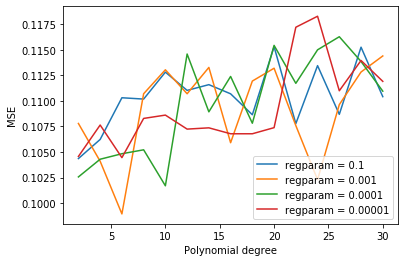

In [34]:
polynomial_degrees = [2,4,6,8,10,12,14,16,18,20, 22, 24, 26, 28, 30]
reg_params = [0.1,0.001,0.0001,0.00001]

from sklearn.preprocessing import PolynomialFeatures

for reg_param in reg_params:
    mse_values = []
    print("Regularization parameter :", reg_param)
    for degree in polynomial_degrees:
        print("Degree:" , degree)
        poly = PolynomialFeatures(degree, include_bias = False)
        d = poly.fit_transform(data)
        #Setting up each layer
        l1 = Layer(d.shape[1], 20,activation_function= "sigmoid")
        l2 = Layer(20, 10, activation_function = "sigmoid")
        l3 = Layer(10,5,activation_function = "sigmoid")
        l4 = Layer(5,1,activation_function = None)

        #Setting up the nerual network and adds each layer.
        nnet = NN(cost_function="mse")
        nnet.add_layer(l1)
        nnet.add_layer(l2)
        nnet.add_layer(l3)
        nnet.add_layer(l4)
        mse_values.append(cv_regression_scores_nn(5, d, target,nnet, 500, 50 , 0.001, reg_param ))
    plt.plot(polynomial_degrees, mse_values)
    mse_values = []
plt.legend(["regparam = 0.1", "regparam = 0.001", "regparam = 0.0001", "regparam = 0.00001"])
plt.xlabel("Polynomial degree")
plt.ylabel("MSE")
plt.savefig(fname = r"Plots\nn_regression_poly_degree")
plt.show()

Regularization parameter : 0.1
Degree: 2
0
MSE_final:  0.13659137252925624
1
MSE_final:  0.17035046420314717
2
MSE_final:  0.1492969421800554
3
MSE_final:  0.1543109042719704
4
MSE_final:  0.15060578939020278
CV-MSE:  0.1522310945149264
Degree: 4
0
MSE_final:  0.1405505125329678
1
MSE_final:  0.22067833504097872
2
MSE_final:  0.2389381901766817
3
MSE_final:  0.12547321361274255
4
MSE_final:  0.1354759485893468
CV-MSE:  0.1722232399905435
Degree: 6
0
MSE_final:  0.13815979541818144
1
MSE_final:  0.209147555104051
2
MSE_final:  0.1252921495737098
3
MSE_final:  0.09358193716848062
4
MSE_final:  0.19764489430136822
CV-MSE:  0.1527652663131582
Degree: 8
0
MSE_final:  0.13818320169052906
1
MSE_final:  0.16793494901399267
2
MSE_final:  0.1469811441529568
3
MSE_final:  0.16709612069966365
4
MSE_final:  0.1497040484931969
CV-MSE:  0.15397989281006783
Degree: 10
0
MSE_final:  0.17881813589794268
1
MSE_final:  0.1717306590386963
2
MSE_final:  0.1558155604698735
3
MSE_final:  0.11095384846745171
4

C:\Users\marth\OneDrive\Dokumenter\GitHub\FYS-STK4155-project-2\nn.py:72: RuntimeWarning: overflow encountered in exp
  vals = 1/(1+np.exp(-z))


1
MSE_final:  0.20459205320564836
2
MSE_final:  0.09127354883755942
3
MSE_final:  0.1963269552063878
4
MSE_final:  0.14111322242427563
CV-MSE:  0.16146082528274802
Regularization parameter : 0.001
Degree: 2
0
MSE_final:  0.1486203740919294
1
MSE_final:  0.16630823778618814
2
MSE_final:  0.17449831462081142
3
MSE_final:  0.15584389786685274
4
MSE_final:  0.1502152233237496
CV-MSE:  0.15909720953790624
Degree: 4
0
MSE_final:  0.1931871295583307
1
MSE_final:  0.18446103299565228
2
MSE_final:  0.1311626120379683
3
MSE_final:  0.15288724355990044
4
MSE_final:  0.16079607008790003
CV-MSE:  0.16449881764795035
Degree: 6
0
MSE_final:  0.11960878521748024
1
MSE_final:  0.1918176025214462
2
MSE_final:  0.19503202035714534
3
MSE_final:  0.20114798544024395
4
MSE_final:  0.20283593337780276
CV-MSE:  0.1820884653828237
Degree: 8
0
MSE_final:  0.13382095262684598
1
MSE_final:  0.21603532771012066
2
MSE_final:  0.15027013338698453
3
MSE_final:  0.17983743946966863
4
MSE_final:  0.13890102058097378
CV

C:\Users\marth\OneDrive\Dokumenter\GitHub\FYS-STK4155-project-2\nn.py:72: RuntimeWarning: overflow encountered in exp
  vals = 1/(1+np.exp(-z))


0
MSE_final:  0.18793185572533905
1
MSE_final:  0.13969768135651103
2
MSE_final:  0.12837023429202327
3
MSE_final:  0.16489726991712872
4
MSE_final:  0.17251895218951158
CV-MSE:  0.15868319869610273
Degree: 30
0
MSE_final:  0.1239919601653577
1
MSE_final:  0.21181181414033703
2
MSE_final:  0.13197321880297735
3
MSE_final:  0.1199162043064386
4
MSE_final:  0.19990587150776337
CV-MSE:  0.15751981378457483
Regularization parameter : 0.0001
Degree: 2
0
MSE_final:  0.20139464723674463
1
MSE_final:  0.1896724569859134
2
MSE_final:  0.17430344099174794
3
MSE_final:  0.13568635078610986
4
MSE_final:  0.17043444117428652
CV-MSE:  0.1742982674349605
Degree: 4
0
MSE_final:  0.14567623973996296
1
MSE_final:  0.14268941687512562
2
MSE_final:  0.1561027139472344
3
MSE_final:  0.16549912438671904
4
MSE_final:  0.1321425441939485
CV-MSE:  0.14842200782859813
Degree: 6
0
MSE_final:  0.1638432678665544
1
MSE_final:  0.16943987633894492
2
MSE_final:  0.21321996552430136
3
MSE_final:  0.15524161532813163


C:\Users\marth\OneDrive\Dokumenter\GitHub\FYS-STK4155-project-2\nn.py:72: RuntimeWarning: overflow encountered in exp
  vals = 1/(1+np.exp(-z))


2
MSE_final:  0.19542517149371536
3
MSE_final:  0.1610208180990357
4
MSE_final:  0.18787500870954835
CV-MSE:  0.1737250033538249
Regularization parameter : 1e-05
Degree: 2
0
MSE_final:  0.1957938982616422
1
MSE_final:  0.11180843381337238
2
MSE_final:  0.12892139011758533
3
MSE_final:  0.12411861748054535
4
MSE_final:  0.12114338141423545
CV-MSE:  0.13635714421747613
Degree: 4
0
MSE_final:  0.11797681028330509
1
MSE_final:  0.17929373693581643
2
MSE_final:  0.13518410141752846
3
MSE_final:  0.12818406341967667
4
MSE_final:  0.13417491248110544
CV-MSE:  0.13896272490748643
Degree: 6
0
MSE_final:  0.15190146449876316
1
MSE_final:  0.20903117200498014
2
MSE_final:  0.14230854635664913
3
MSE_final:  0.19536408804477384
4
MSE_final:  0.13734660128182877
CV-MSE:  0.16719037443739898
Degree: 8
0
MSE_final:  0.11410976957146834
1
MSE_final:  0.20466179865396156
2
MSE_final:  0.1436672252669525
3
MSE_final:  0.13756459948889135
4
MSE_final:  0.18613557693537153
CV-MSE:  0.15722779398332903
Degr

C:\Users\marth\OneDrive\Dokumenter\GitHub\FYS-STK4155-project-2\nn.py:72: RuntimeWarning: overflow encountered in exp
  vals = 1/(1+np.exp(-z))


3
MSE_final:  0.1577098636903603
4
MSE_final:  0.18857070293411643
CV-MSE:  0.17053756708194534
Degree: 28
0
MSE_final:  0.10911772287169316
1
MSE_final:  0.16357983359275213
2
MSE_final:  0.15047941412458019
3
MSE_final:  0.16805847815425556
4
MSE_final:  0.18016027944763374
CV-MSE:  0.15427914563818296
Degree: 30
0
MSE_final:  0.1437770595717398
1
MSE_final:  0.1590622521910417
2
MSE_final:  0.14071259304190803
3
MSE_final:  0.12956996302386994
4
MSE_final:  0.1753669451495194
CV-MSE:  0.1496977625956158


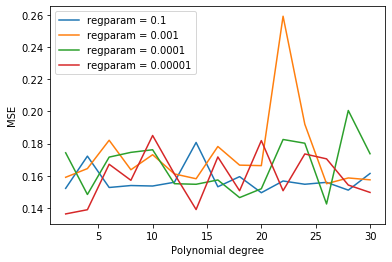

In [5]:
polynomial_degrees = [2,4,6,8,10,12,14,16,18,20, 22, 24, 26, 28, 30]
reg_params = [0.1,0.001,0.0001,0.00001]

from sklearn.preprocessing import PolynomialFeatures

for reg_param in reg_params:
    mse_values = []
    print("Regularization parameter :", reg_param)
    for degree in polynomial_degrees:
        print("Degree:" , degree)
        poly = PolynomialFeatures(degree, include_bias = False)
        d = poly.fit_transform(data)
        #Setting up each layer
        l1 = Layer(d.shape[1], 20,activation_function= "sigmoid")
        l2 = Layer(20, 10, activation_function = "sigmoid")
        l3 = Layer(10,5,activation_function = "sigmoid")
        l4 = Layer(5,1,activation_function = None)

        #Setting up the nerual network and adds each layer.
        nnet = NN(cost_function="mse")
        nnet.add_layer(l1)
        nnet.add_layer(l2)
        nnet.add_layer(l3)
        nnet.add_layer(l4)
        mse_values.append(cv_regression_scores_nn(5, d, target,nnet, 500, 50 , 0.00001, reg_param ))
    plt.plot(polynomial_degrees, mse_values)
    mse_values = []
plt.legend(["regparam = 0.1", "regparam = 0.001", "regparam = 0.0001", "regparam = 0.00001"])
plt.xlabel("Polynomial degree")
plt.ylabel("MSE")
plt.savefig(fname = r"Plots\nn_regression_poly_degree_lr_00001")
plt.show()

# Grid search for finding the optimal parameters

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from project1_lib import make_franke_vecs

from nn import NN, Layer, cv_regression_scores_nn, plot_bias_variance_nn_reg

#Reading the data
data, target = make_franke_vecs(0.3, 20)
target = np.expand_dims(target, axis=1)

#Setting up each layer
l1 = Layer(data.shape[1], 20,activation_function= "sigmoid")
l2 = Layer(20, 10, activation_function = "sigmoid")
l3 = Layer(10,5,activation_function = "sigmoid")
l4 = Layer(5,1,activation_function = None)

#Setting up the nerual network and adds each layer.
nnet = NN(cost_function="mse")
nnet.add_layer(l1)
nnet.add_layer(l2)
nnet.add_layer(l3)
nnet.add_layer(l4)

#GRID SEARCH FOR FINDING THE OPTIMAL PARAMETERS
n_lr_values = 5      #Number of learning rate values in grid search.
lr_values = np.logspace(-6,-2, n_lr_values)   #Vector of learning rate values.

n_reg_lam_values = 6      #Number of regularization rate parameteres in grid search.
reg_lam_values = np.logspace(-6,-1,n_reg_lam_values)   #Vector of reg param values.

mse_scores = np.zeros(shape=(n_lr_values, n_reg_lam_values))

#Searching thourgh the grid and updates the MSE matrix.
for i, learning_rate in enumerate(lr_values):
    for j,reg_lam in enumerate(reg_lam_values):
        cv_mse = cv_regression_scores_nn(5, data, target, nnet, 500, 50, learning_rate, reg_lam)
        mse_scores[i,j] = cv_mse

#Converts to pandas dataframe to make plotting easier.
mse_scores = pd.DataFrame(mse_scores, columns=np.round(reg_lam_values,6), index =np.round(lr_values,6) )

ax = sns.heatmap(mse_scores, annot=True, fmt=".4f", linewidths=0.5, cbar_kws={"label": "mse score" })
plt.ylim(top = 0, bottom=n_lr_values)
plt.xlabel("regularization parameter")
plt.ylabel("learning rate")

plt.show()

0
MSE_final:  4.662740296662383
1
MSE_final:  0.209535664294657
2
MSE_final:  4.038033017947738
3
MSE_final:  0.6465568197203995
4
MSE_final:  1.5552617400058844
CV-MSE:  2.2224255077262125
